In [1]:
import librosa
import numpy as np
from pydub import AudioSegment
from sklearn import preprocessing
from matplotlib import pyplot as plt
from scipy import signal
import pandas as pd

d:\program files\jetbrains\ideaprojects\ebeat\venv\lib\site-packages\pydub\utils.py:165: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


In [2]:
pathAudio = 'C:/Users/Admin/Downloads/Technology Lab/sampling/train-stochastic/'
files = librosa.util.find_files(pathAudio, ext=['wav'])
files = sorted(files, key=lambda x: int(x.split('_')[-1].split(".")[0]))

In [5]:
import os
os.path.basename(files[0])

'Tea K Pea - nauticals_1.wav'

In [6]:
from pathlib import Path

Path(files[0]).stem

'Tea K Pea - nauticals_1'

In [ ]:
samples = []
max_len = 0
for file_name in files:
    song, sr = librosa.load(file_name)
    resampled_part = signal.resample(song, int(len(song)/15))
    max_len += len(resampled_part)
    samples.append(resampled_part)
max_len

In [43]:
samples = np.array(samples)
full_song = []
for sample in samples:
    full_song.extend(sample)

C:\Users\Admin\AppData\Local\Temp\ipykernel_15864\2919224953.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  samples = np.array(samples)


In [45]:
full_song = np.array(full_song)
full_song.shape

(326330,)

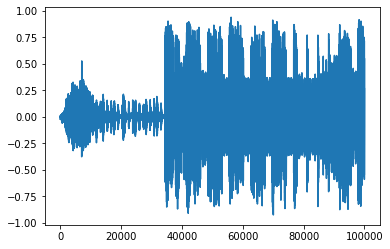

In [51]:
plt.plot(full_song[:100000])
plt.show()

In [50]:
frami = pd.DataFrame(columns=['actual'], data=full_song[:100000])
frami

,actual
0,-0.022670
1,0.006272
2,-0.003801
3,0.002728
4,-0.002127
...,...
99995,0.470886
99996,0.551510
99997,0.206552
99998,0.136482


In [7]:
prev_batch_size = 880 * 2
next_batch_size = 60
sum_batch_size = prev_batch_size+next_batch_size
X = []
Y = []
for i in range(0, len(samples)-prev_batch_size):
    if i < len(samples)-sum_batch_size:
        Y.append(samples[i+prev_batch_size:i+sum_batch_size])
        X.append(np.array(samples[i:i+prev_batch_size]))

In [8]:
X = np.array(X).reshape(-1, prev_batch_size, 1)
Y = np.array(Y).reshape(-1, next_batch_size)

In [9]:
X.shape

(193984, 1760, 1)

In [10]:
Y.shape

(193984, 60)

In [75]:
from keras.layers import LSTM, Dense, Conv1D, MaxPool1D, ConvLSTM1D, Reshape
from keras.models import  Sequential

model = Sequential()
model.add(Conv1D(filters=20, kernel_size=1000, input_shape=(1760, 1)))
model.add(MaxPool1D(pool_size=10, strides=5))
model.add(LSTM(100, activation='sigmoid'))
model.add(Dense(60))
'''model = Sequential()
model.add(Conv1D(filters=20, kernel_size=1000, input_shape=(1760, 1)))
model.add(MaxPool1D(pool_size=10, strides=2))
model.add(Reshape((-1, 376, 20)))
model.add(ConvLSTM1D(filters=100, kernel_size=100))
model.add(LSTM(100, activation='sigmoid'))
model.add(Dense(60))'''

model.compile(optimizer='rmsprop', loss='mse')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 761, 20)           20020     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 376, 20)          0         
 1D)                                                             
                                                                 
 reshape_1 (Reshape)         (None, 1, 376, 20)        0         
                                                                 
 conv_lstm1d_1 (ConvLSTM1D)  (None, 277, 100)          4800400   
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dense_1 (Dense)             (None, 60)                6060      
                                                      

In [12]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [77]:
model.fit(X, Y, epochs=1)

6062/6062 [==============================] - 6304s 1s/step - loss: 0.0244


In [20]:
filename = 'model_weights.h5'
model.save(filename)

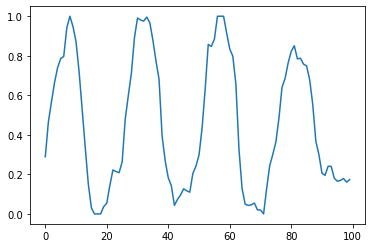

In [83]:
nr = 150000
plt.plot(X[nr+1].reshape(prev_batch_size, 1)[:100])
plt.show()

In [84]:
'''example = X[11000].reshape(1, 1, 1760, 1)'''
example = X[400]
example = example.reshape(1, 1760, 1)
example.shape

(1, 1760, 1)

In [85]:
'''pred = model.predict(example)'''
pred = model.predict(example)
example

array([[[0.48085076],
        [0.44617801],
        [0.46914805],
        ...,
        [0.42117336],
        [0.53303153],
        [0.51569551]]])

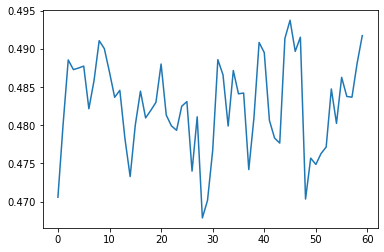

In [86]:
plt.plot(pred[0])
plt.show()